In [23]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import zscore
from sklearn import preprocessing
from sklearn.model_selection import train_test_split, GridSearchCV

In [3]:
data=pd.read_csv("Sleep_health_and_lifestyle_dataset.csv",index_col=0)
data.head()

,Gender,Age,Occupation,Sleep Duration,Quality of Sleep,Physical Activity Level,Stress Level,BMI Category,Blood Pressure,Heart Rate,Daily Steps,Sleep Disorder
Person ID,,,,,,,,,,,,
1,Male,27,Software Engineer,6.1,6,42,6,Overweight,126/83,77,4200,None
2,Male,28,Doctor,6.2,6,60,8,Normal,125/80,75,10000,None
3,Male,28,Doctor,6.2,6,60,8,Normal,125/80,75,10000,None
4,Male,28,Sales Representative,5.9,4,30,8,Obese,140/90,85,3000,Sleep Apnea
5,Male,28,Sales Representative,5.9,4,30,8,Obese,140/90,85,3000,Sleep Apnea


### feature columns
Person ID: An identifier for each individual.

Gender: The gender of the person (Male/Female).

Age: The age of the person in years.

Occupation: The occupation or profession of the person.

Sleep Duration (hours): The number of hours the person sleeps per day.

Quality of Sleep (scale: 1-10): A subjective rating of the quality of sleep, ranging from 1 to 10.

Physical Activity Level (minutes/day): The number of minutes the person engages in physical activity daily.

Stress Level (scale: 1-10): A subjective rating of the stress level experienced by the person, ranging from 1 to 10.

BMI Category: The BMI category of the person (e.g., Underweight, Normal, Overweight).

Blood Pressure (systolic/diastolic): The blood pressure measurement of the person, indicated as systolic pressure over diastolic pressure.

Heart Rate (bpm): The resting heart rate of the person in beats per minute.

Daily Steps: The number of steps the person takes per day.

Sleep Disorder: The presence or absence of a sleep disorder in the person (None, Insomnia, Sleep Apnea).

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 374 entries, 1 to 374
Data columns (total 12 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Gender                   374 non-null    object 
 1   Age                      374 non-null    int64  
 2   Occupation               374 non-null    object 
 3   Sleep Duration           374 non-null    float64
 4   Quality of Sleep         374 non-null    int64  
 5   Physical Activity Level  374 non-null    int64  
 6   Stress Level             374 non-null    int64  
 7   BMI Category             374 non-null    object 
 8   Blood Pressure           374 non-null    object 
 9   Heart Rate               374 non-null    int64  
 10  Daily Steps              374 non-null    int64  
 11  Sleep Disorder           374 non-null    object 
dtypes: float64(1), int64(6), object(5)
memory usage: 38.0+ KB


In [6]:
data.shape

(374, 12)

In [7]:
data.isna().sum()

Gender                     0
Age                        0
Occupation                 0
Sleep Duration             0
Quality of Sleep           0
Physical Activity Level    0
Stress Level               0
BMI Category               0
Blood Pressure             0
Heart Rate                 0
Daily Steps                0
Sleep Disorder             0
dtype: int64

In [8]:
data['BMI Category'] = data['BMI Category'].replace({'Normal Weight': 'Normal'})

# Exploratory Data Analysis

### univariate analysis

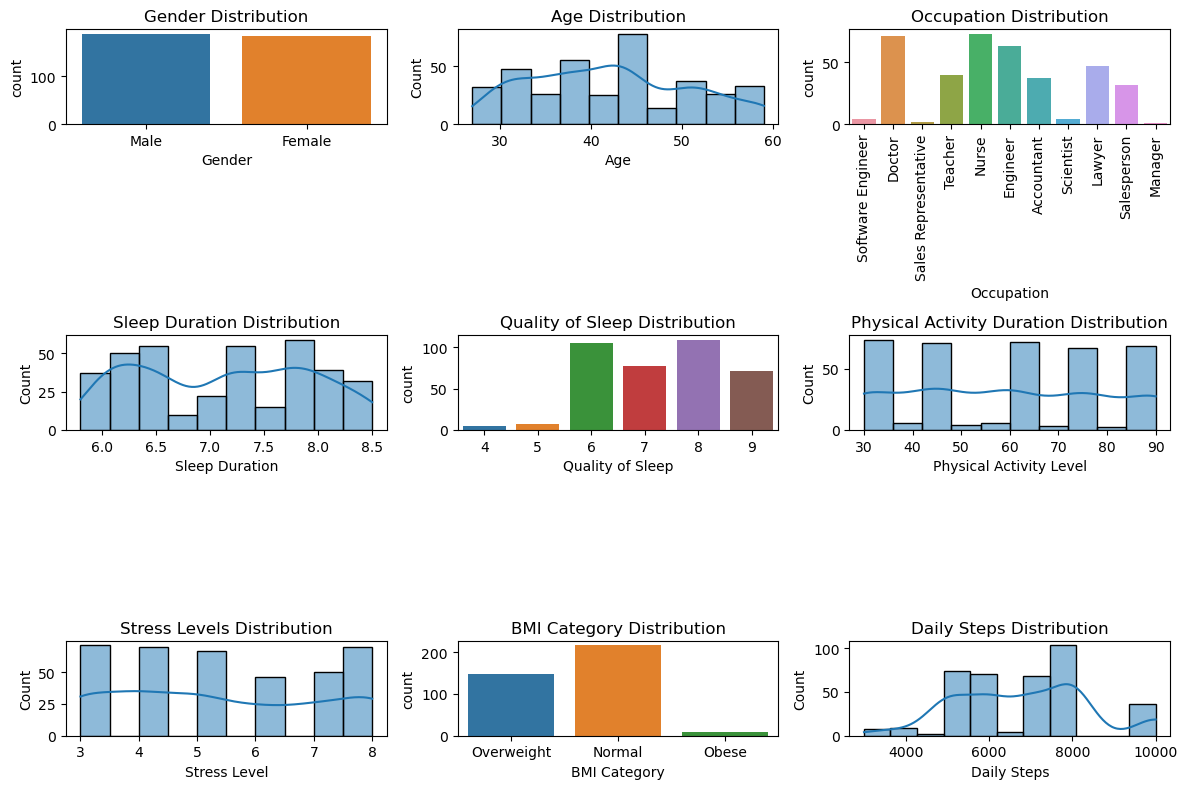

In [10]:
plt.figure(figsize=(12, 8))

# Gender
plt.subplot(3, 3, 1)
sns.countplot(x='Gender', data=data)
plt.title('Gender Distribution')

# Age
plt.subplot(3, 3, 2)
sns.histplot(data['Age'], kde=True)
plt.title('Age Distribution')

# Occupation
plt.subplot(3, 3, 3)
sns.countplot(x='Occupation', data=data)
plt.title('Occupation Distribution')
plt.xticks(rotation=90)

# Sleep Duration
plt.subplot(3, 3, 4)
sns.histplot(data['Sleep Duration'], kde=True)
plt.title('Sleep Duration Distribution')

# Quality of Sleep
plt.subplot(3, 3, 5)
sns.countplot(x='Quality of Sleep', data=data)
plt.title('Quality of Sleep Distribution')

# Physical Activity Duration
plt.subplot(3, 3, 6)
sns.histplot(data['Physical Activity Level'], kde=True)
plt.title('Physical Activity Duration Distribution')

# Stress Levels
plt.subplot(3, 3, 7)
sns.histplot(data['Stress Level'], kde=True)
plt.title('Stress Levels Distribution')

# BMI Category
plt.subplot(3, 3, 8)
sns.countplot(x='BMI Category', data=data)
plt.title('BMI Category Distribution')

# Daily Steps
plt.subplot(3, 3, 9)
sns.histplot(data['Daily Steps'], kde=True)
plt.title('Daily Steps Distribution')

plt.tight_layout()
plt.show()

# Descriptive Analysis

In [13]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
Age,374.0,42.184492,8.673133,27.0,35.25,43.0,50.0,59.0
Sleep Duration,374.0,7.132086,0.795657,5.8,6.40,7.2,7.8,8.5
Quality of Sleep,374.0,7.312834,1.196956,4.0,6.00,7.0,8.0,9.0
Physical Activity Level,374.0,59.171123,20.830804,30.0,45.00,60.0,75.0,90.0
Stress Level,374.0,5.385027,1.774526,3.0,4.00,5.0,7.0,8.0
Heart Rate,374.0,70.165775,4.135676,65.0,68.00,70.0,72.0,86.0
Daily Steps,374.0,6816.844920,1617.915679,3000.0,5600.00,7000.0,8000.0,10000.0


# Observations from Univariate and Descriptive Analysis
The data is evenly distributed between male and female.

By performing a histplot, we got to know the Age Distribution. The data contains examples ranging from 27 years of age to a maximum of 59, the mean age being 42 and median age being 43.

Sleep Duration Ditribution is fairly simple. An average sleep of 7 hours, which is ideal. With very few people getting sleep less than 6 hours, closer to 4-5 hours.

Physical Acitivity Level shows the periodic trend of people working out for durations like 30 mins, 45 mins, 60 mins, 75 mins and 90 mins. With the average of working out for an hour.

Stress Level shows an average of 5, ranging from the lowest of 3 to a highest of 8.

Heart Rate and Daily Steps distribution seem pretty average, with the mean heart rate being 70 and the highest being 86, which is average for an adult and daily steps ranging from 3000 being the lowest and 10000 being the highest, with average of 6819 steps daily.

# Bivariate Analysis

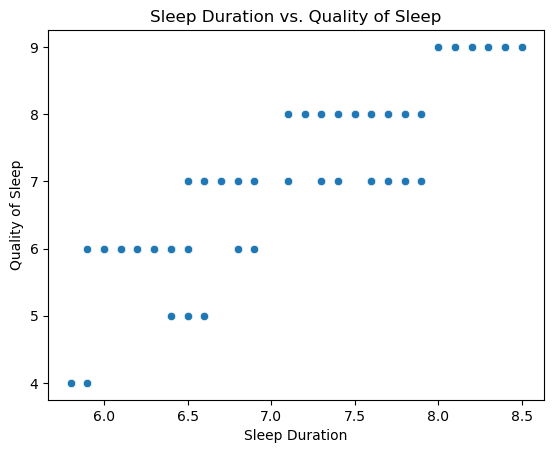

In [14]:
# Sleep Duration vs. Quality of Sleep:
sns.scatterplot(x='Sleep Duration', y='Quality of Sleep', data=data)
plt.title('Sleep Duration vs. Quality of Sleep')
plt.show()

To check how of duration of sleep affects quality sleep, I performed a scatterplot between duration and quality of sleep. We found out that people who slept less that average of 7.2 hours have less than average quality of sleep which is 7(subjective number defining quality of sleep on a scale of 10).

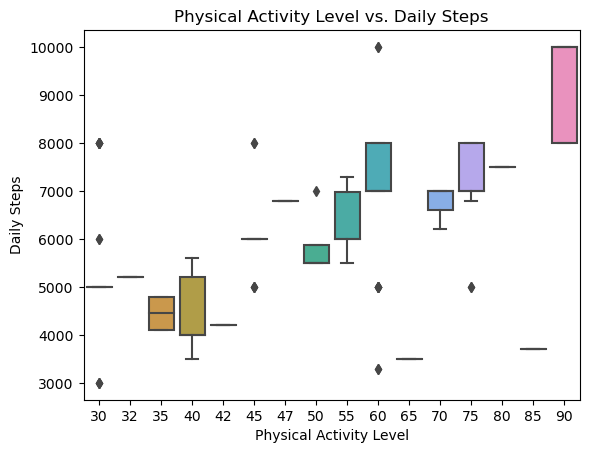

In [15]:
# Physical Activity Level vs. Daily Steps:
sns.boxplot(x='Physical Activity Level', y='Daily Steps', data=data)
plt.title('Physical Activity Level vs. Daily Steps')
plt.show()

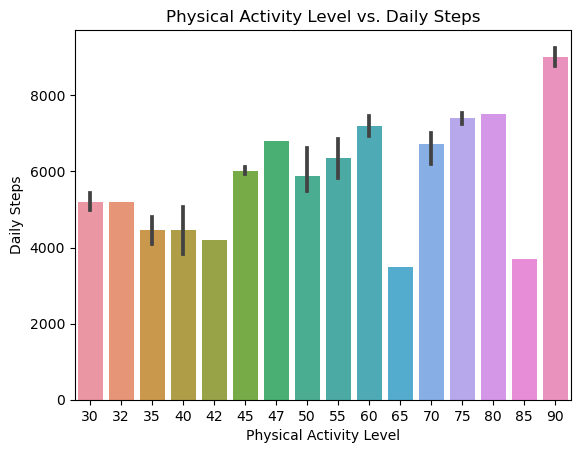

In [16]:
sns.barplot(x='Physical Activity Level', y='Daily Steps', data=data)
plt.title('Physical Activity Level vs. Daily Steps')
plt.show()

To cross check the acitivity levels of individual w.r.t the number of daily steps they take I performed boxplot on Physical Activity Level, which is the duration of exercise the individual claimed they did(in minutes) vs the number of steps they walked daily. The overall observation is as expected, there is a linear increase in Physical Activity Level and Daily Steps taken. Also, there are some outliers that shows that sometimes people might be walking less than others with their acitivity level and doing weight training more or some people might be doing more cardio than weight training which means they might be walking more steps than others with their activity level

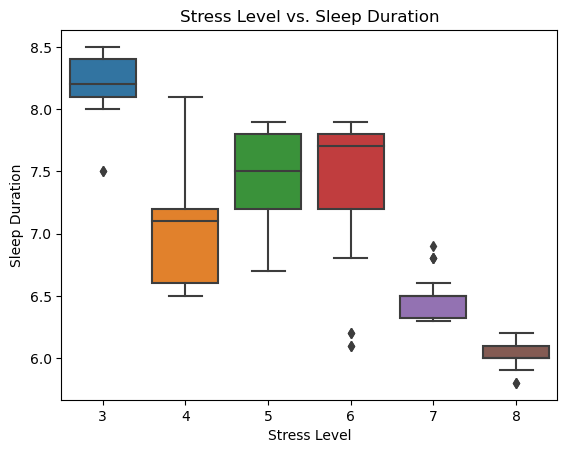

In [17]:
# Stress Level vs Sleep Duration
sns.boxplot(x='Stress Level', y='Sleep Duration', data=data)
plt.title('Stress Level vs. Sleep Duration')
plt.show()

Performing a boxplot between stress level and sleep duration to find any pattern between the two. The observation shows that their is a decrease in stress levels with increase in sleep duration. Sleep Duration and Stress Level has bi-directional relationship. Stress can affect sleep duration in a sense that there might be difficult sleeping thereby reducind quality of sleep as well. On the other hand, sleeping less can cause stress, because adequate sleep is necessary for emotional well-being and regulation. Lack of sleep can affect your coping mechansim as it can impair your cognitive functions. Ofcourse, there are some outliers as it can depend on person to person but there is a general pattern here which we are able to see here.

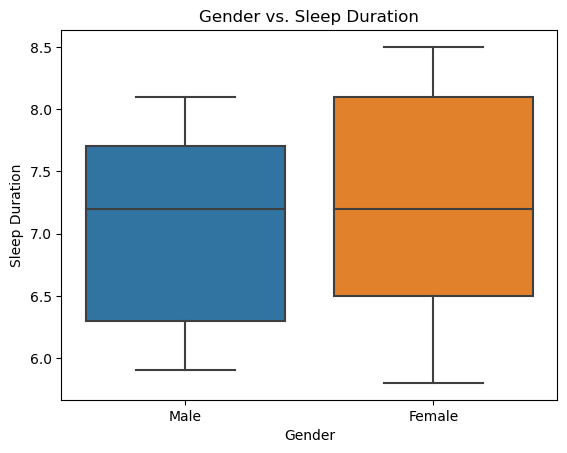

In [18]:
# Gender vs Sleep Duration
sns.boxplot(x='Gender', y='Sleep Duration', data=data)
plt.title('Gender vs. Sleep Duration')
plt.show()

After performing a boxplot between Sleep Duration and Gender we found that on an average even though there is no difference but women slightly tend to sleep for longer duration than men.

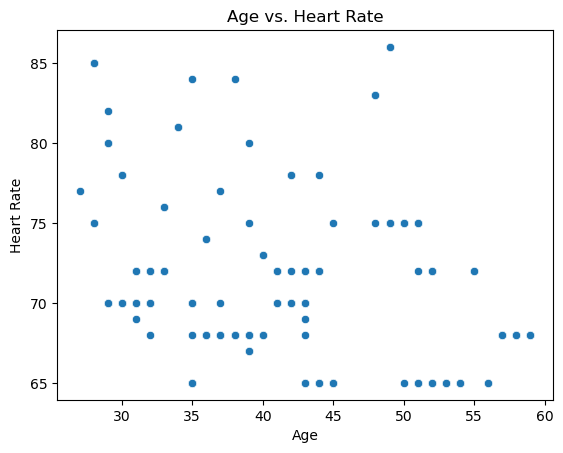

In [19]:
# Age vs Heart Rate:
sns.scatterplot(x='Age', y='Heart Rate', data=data)
plt.title('Age vs. Heart Rate')
plt.show()

The gradual decrease in heart rate w.r.t age which is known fact that MHR or mean heart rate decreases as a person ages.

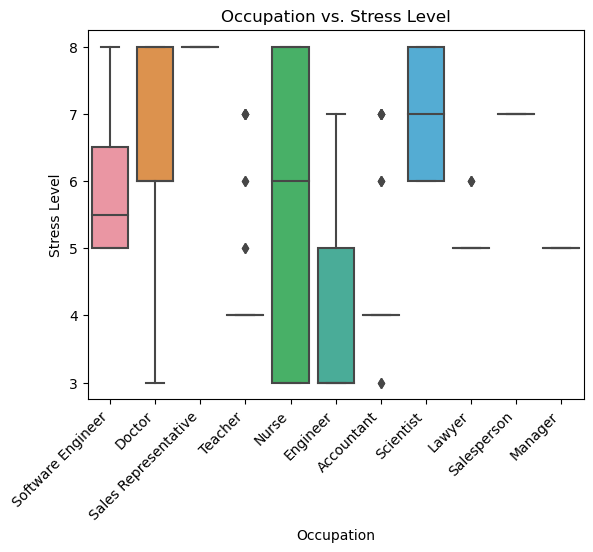

In [20]:
# Occupation vs Stress Level:
sns.boxplot(x='Occupation', y='Stress Level', data=data)
plt.title('Occupation vs. Stress Level')
plt.xticks(rotation=45, ha='right')
plt.show()

This showcases different stress level w.r.t jobs where stress can be pretty high for jobs like doctors and scientist while software engineers have average stress levels or less. Nurses having varied levels of stress, depending on maybe the types of wards they work in(eg. emergency, general, etc.)

# Data Preprocessing
Converting Blood Pressure into Systolic BP and Diastolic BP

In [21]:
# Spliting 'Blood Pressure' into 'Systolic' and 'Diastolic'
data[['Systolic', 'Diastolic']] = data['Blood Pressure'].str.split('/', expand=True).astype(int)

# Droping the original 'Blood Pressure' column
data = data.drop('Blood Pressure', axis=1)

data.head()

,Gender,Age,Occupation,Sleep Duration,Quality of Sleep,Physical Activity Level,Stress Level,BMI Category,Heart Rate,Daily Steps,Sleep Disorder,Systolic,Diastolic
Person ID,,,,,,,,,,,,,
1,Male,27,Software Engineer,6.1,6,42,6,Overweight,77,4200,None,126,83
2,Male,28,Doctor,6.2,6,60,8,Normal,75,10000,None,125,80
3,Male,28,Doctor,6.2,6,60,8,Normal,75,10000,None,125,80
4,Male,28,Sales Representative,5.9,4,30,8,Obese,85,3000,Sleep Apnea,140,90
5,Male,28,Sales Representative,5.9,4,30,8,Obese,85,3000,Sleep Apnea,140,90


# Standardizing Data to Checking for Outliers

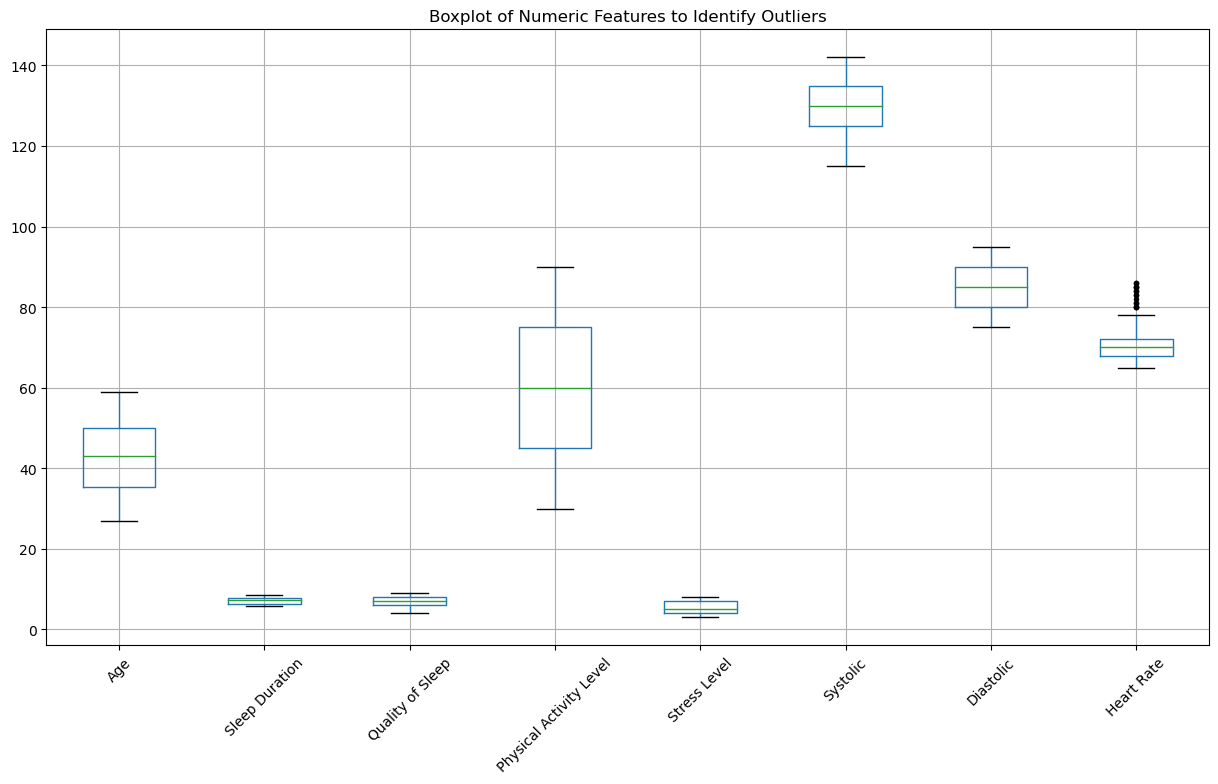

Rows containing outliers:
Empty DataFrame
Columns: [Gender, Age, Occupation, Sleep Duration, Quality of Sleep, Physical Activity Level, Stress Level, BMI Category, Heart Rate, Daily Steps, Sleep Disorder, Systolic, Diastolic]
Index: []


In [24]:
numeric_features = ['Age', 'Sleep Duration', 'Quality of Sleep', 'Physical Activity Level', 'Stress Level', 'Systolic', 'Diastolic', 'Heart Rate']

# Box plots to visualize outliers
plt.figure(figsize=(15, 8))
data[numeric_features].boxplot(sym='k.', whis=1.5)
plt.title('Boxplot of Numeric Features to Identify Outliers')
plt.xticks(rotation=45)
plt.show()

# Z-score method for outlier detection
z_scores = zscore(data[numeric_features])
abs_z_scores = abs(z_scores)
outliers = (abs_z_scores > 3).all(axis=1)

# Printing the rows containing outliers
print("Rows containing outliers:")
print(data[outliers])

In [25]:
data.corr()

C:\Users\ADMIN\AppData\Local\Temp\ipykernel_18188\2627137660.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  data.corr()


,Age,Sleep Duration,Quality of Sleep,Physical Activity Level,Stress Level,Heart Rate,Daily Steps,Systolic,Diastolic
Age,1.000000,0.344709,0.473734,0.178993,-0.422344,-0.225606,0.057973,0.605878,0.593839
Sleep Duration,0.344709,1.000000,0.883213,0.212360,-0.811023,-0.516455,-0.039533,-0.180406,-0.166570
Quality of Sleep,0.473734,0.883213,1.000000,0.192896,-0.898752,-0.659865,0.016791,-0.121632,-0.110151
Physical Activity Level,0.178993,0.212360,0.192896,1.000000,-0.034134,0.136971,0.772723,0.265416,0.382651
Stress Level,-0.422344,-0.811023,-0.898752,-0.034134,1.000000,0.670026,0.186829,0.102818,0.091811
Heart Rate,-0.225606,-0.516455,-0.659865,0.136971,0.670026,1.000000,-0.030309,0.294143,0.271092
Daily Steps,0.057973,-0.039533,0.016791,0.772723,0.186829,-0.030309,1.000000,0.103342,0.241986
Systolic,0.605878,-0.180406,-0.121632,0.265416,0.102818,0.294143,0.103342,1.000000,0.972885
Diastolic,0.593839,-0.166570,-0.110151,0.382651,0.091811,0.271092,0.241986,0.972885,1.000000


C:\Users\ADMIN\AppData\Local\Temp\ipykernel_18188\1794321463.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(data.corr())


<Axes: >

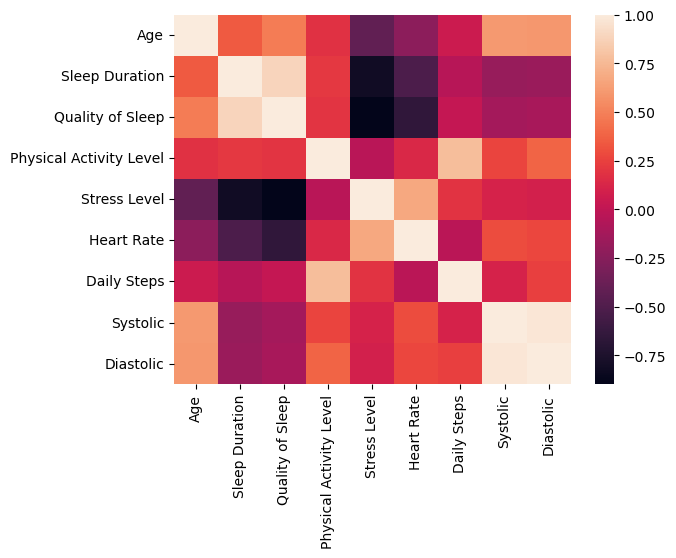

In [26]:
sns.heatmap(data.corr())